In [ ]:
import json
import pandas as pd
import matplotlib.pyplot as plt

with open("data/results_raw.jsonl") as f:
    df = pd.DataFrame(json.loads(line) for line in f)
df["exact_match"] = df["pred"] == df["target"]
df["error"] = ~df["exact_match"]

split_dfs = {split: sdf.copy() for split, sdf in df.groupby("split")}

metrics = {
    split: {"exact_match": sdf["exact_match"].mean(), "count": len(sdf)}
    for split, sdf in split_dfs.items()
}

with open("results.json", "w") as f:
    json.dump(metrics, f, indent=2)

def plot_err_rate_hist(split):
    g = (
        split_dfs[split]
        .groupby("num_carries")["error"]
        .mean()
        .reset_index()
        .sort_values("num_carries")
    )
    ax = g.plot.bar(x="num_carries", y="error", legend=False, color="#d9534f",
                    title=f"Error rate by num_carries ({split})")
    ax.set_xlabel("num_carries")
    ax.set_ylabel("error rate")
    plt.show()

Saved metrics: {'test_4digit': {'exact_match': np.float64(0.0), 'count': 5000}, 'test_holdout_a': {'exact_match': np.float64(0.8924), 'count': 5000}, 'test_leading_zero': {'exact_match': np.float64(0.0), 'count': 5000}, 'val': {'exact_match': np.float64(0.91515), 'count': 20000}}


In [12]:
def plot_err_rate_hist(split, group):
    g = (
        split_dfs[split]
        .groupby(group)["error"]
        .mean()
        .reset_index()
        .sort_values(group)
    )
    ax = g.plot.bar(x=group, y="error", legend=False, color="#d9534f",
                    title=f"Error rate by {group} ({split})")
    ax.set_xlabel(group)
    ax.set_ylabel("error rate")
    plt.show()

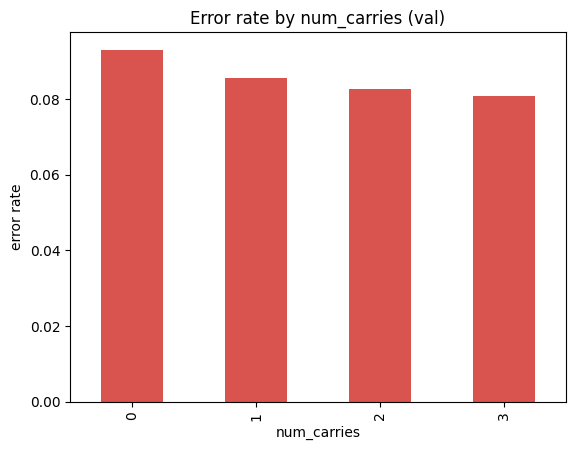

In [15]:
plot_err_rate_hist("val", "num_carries")

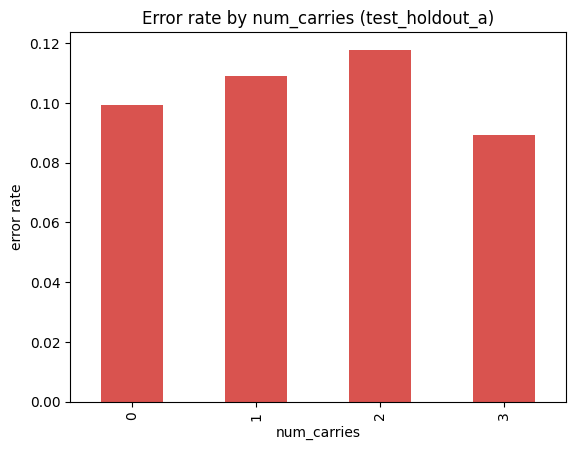

In [14]:
plot_err_rate_hist("test_holdout_a", "num_carries")

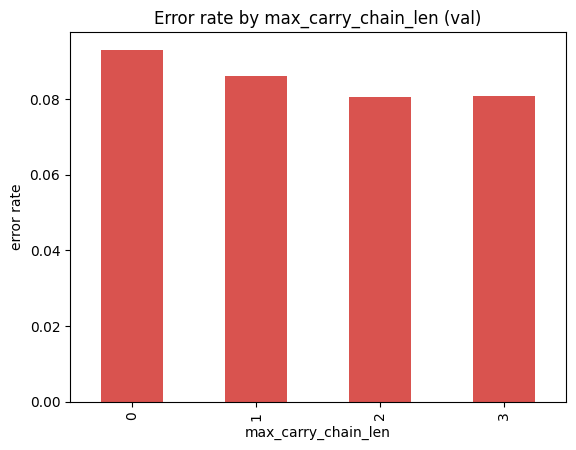

In [16]:
plot_err_rate_hist("val", "max_carry_chain_len")

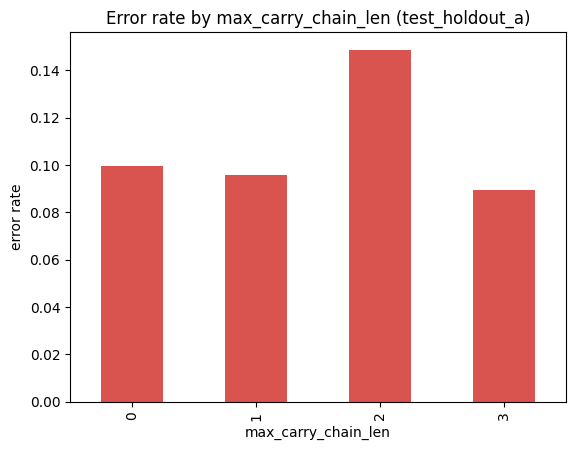

In [17]:
plot_err_rate_hist("test_holdout_a", "max_carry_chain_len")